# Machine Learning

In [31]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_object_dtype
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
import warnings   #ignorer les avertissement 
warnings.filterwarnings('ignore')
from tabulate import tabulate
import operator

### 1. Chargement des données du fichier « Reg.csv ».

In [54]:
df=pd.read_csv("../../Datasets/Reg.csv")
df.sample(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4049,Audi,3600.0,sedan,374,2.5,Diesel,no,2001,A8
1104,Volkswagen,5300.0,sedan,270,1.8,Gas,yes,1997,Passat B5
3309,Toyota,19800.0,crossover,44,2.0,Petrol,yes,2013,Rav 4
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
3042,Mercedes-Benz,10900.0,van,360,2.2,Other,yes,2006,Vito
529,Volkswagen,13499.0,van,154,2.0,Diesel,yes,2013,T5 (Transporter)
1651,Audi,30900.0,crossover,27,2.0,Petrol,yes,2011,Q5
721,Toyota,NaN,sedan,24,2.5,Petrol,yes,2015,Camry
1633,Renault,10499.0,other,160,NaN,Diesel,yes,2013,Trafic
2898,Volkswagen,22000.0,crossover,98,2.0,Diesel,yes,2013,Tiguan


### 2. Découverte du dataset

In [55]:
df.shape

(4345, 9)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


### Données aberrantes

In [57]:
df.rename(columns={'Price':'Prix'}, inplace=True)

In [58]:
df.duplicated().sum()

73

In [52]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

### 4. Conversion des variables contenant des nombres au format float et celles en chaines de caractères en varaibles catégorielles.

In [59]:
model_label = LabelEncoder()
def chainedechar_en_label(vecteur):
    return model_label.fit_transform(vecteur)
df.update(pd.DataFrame.from_dict({nom_colonne : chainedechar_en_label(df[nom_colonne]) for nom_colonne in df if is_object_dtype(df[nom_colonne])}))
df

,Brand,Prix,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,1,4200.0,3,277,2.0,3,1,1991,18
1,2,7900.0,5,427,2.9,0,1,1999,266
2,2,13300.0,3,358,5.0,1,1,2003,237
3,0,23000.0,0,240,4.2,3,1,2007,224
4,5,18300.0,0,120,2.0,3,1,2011,227
...,...,...,...,...,...,...,...,...,...
4340,2,125000.0,3,9,3.0,0,1,2014,233
4341,1,6500.0,3,1,3.5,3,1,1999,37
4342,1,8000.0,3,194,2.0,3,1,1985,31
4343,5,14200.0,3,31,NaN,3,1,2014,114


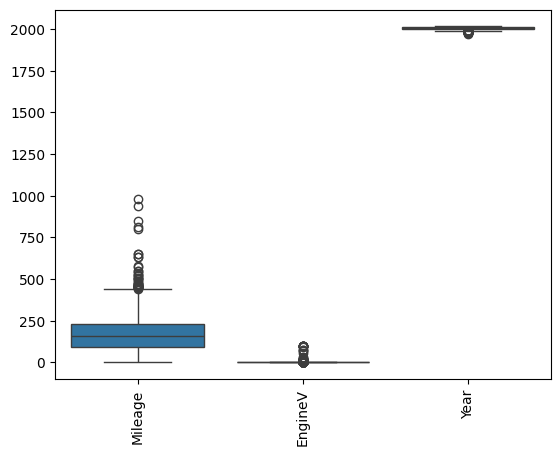

In [45]:
sns.boxplot(df.drop(columns="Prix"))
plt.xticks(rotation=90)
plt.show()

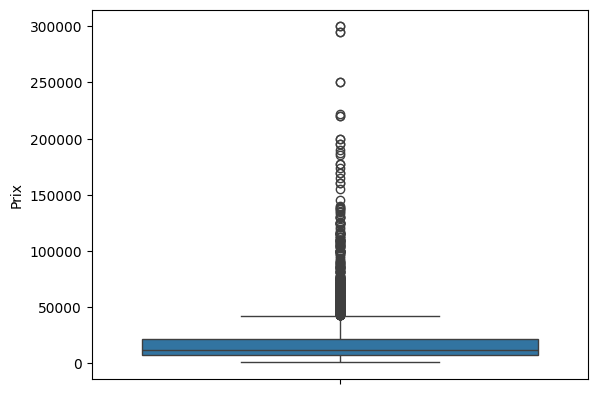

In [46]:
sns.boxplot(df["Prix"])
plt.xticks(rotation=90)
plt.show()

In [23]:
for i in df:
    print(f"----- {i} -----")
    Minimum=df[i].min()
    Maximum=df[i].max()
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    outlier_min=df[i].quantile(0.25)-1.5*IQR
    outlier_max=df[i].quantile(0.75)+1.5*IQR
    outlmin = df[df[i]<outlier_min][i]
    outlmax = df[df[i]>outlier_max][i]
    if len(outlmin)+len(outlmax) != 0 :
        print(f"-- Minimum: {round(outlier_min,2)} - Pas d'ouliers") if Minimum > outlier_min else print(f"!! Minimum: {round(outlier_min,2)} - Ouliers eiistants : {len(outlmin)}")
        print(f"-- Maximum: {round(outlier_max,2)} - Pas d'ouliers") if Maximum < outlier_max else print(f"!! Maximum: {round(outlier_max,2)} - Ouliers existants : {len(outlmax)}")
        print(f"### Il y a {len(outlmin)+len(outlmax)} valeurs aberrantes.")
    else:
        print("-- Aucunes valeurs aberrantes.")

----- Brand -----
-- Aucunes valeurs aberrantes.
----- Prix -----
-- Minimum: -13600.0 - Pas d'ouliers
!! Maximum: 41600.0 - Ouliers existants : 402
### Il y a 402 valeurs aberrantes.
----- Body -----
-- Aucunes valeurs aberrantes.
----- Mileage -----
-- Minimum: -130.0 - Pas d'ouliers
!! Maximum: 446.0 - Ouliers existants : 40
### Il y a 40 valeurs aberrantes.
----- EngineV -----
-- Minimum: 0.25 - Pas d'ouliers
!! Maximum: 4.65 - Ouliers existants : 230
### Il y a 230 valeurs aberrantes.
----- Engine Type -----
-- Aucunes valeurs aberrantes.
----- Registration -----
!! Minimum: 1.0 - Ouliers eiistants : 398
!! Maximum: 1.0 - Ouliers existants : 0
### Il y a 398 valeurs aberrantes.
----- Year -----
!! Minimum: 1989.5 - Ouliers eiistants : 106
-- Maximum: 2025.5 - Pas d'ouliers
### Il y a 106 valeurs aberrantes.
----- Model -----
-- Aucunes valeurs aberrantes.


### 3. Gestion des données manquantes ou dupliquées.

In [9]:
df.isna().sum()

Brand             0
Prix            172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [10]:
def na_en_median(vecteur):
    return vecteur.astype(float).fillna(vecteur.median())
df.update(pd.DataFrame.from_dict({nom_colonne : na_en_median(df[nom_colonne]) for nom_colonne in df if is_numeric_dtype(df[nom_colonne])}))

In [11]:
df.isna().sum().sum()

0

### 5. Analyse statistique univariée et bivariée.

In [13]:
df.describe(include='all')

,Brand,Prix,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345.0,4345.000000,4345.0,4345.000000,4345.000000,4345.0,4345.0,4345.000000,4345.0
unique,7.0,NaN,6.0,NaN,NaN,4.0,2.0,NaN,312.0
top,6.0,NaN,3.0,NaN,NaN,0.0,1.0,NaN,119.0
freq,936.0,NaN,1649.0,NaN,NaN,2019.0,3947.0,NaN,199.0
mean,NaN,19105.277551,NaN,161.237284,2.770341,NaN,NaN,2006.550058,NaN
std,NaN,25120.133334,NaN,105.705797,4.979364,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7100.000000,NaN,86.000000,1.900000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,20900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


array([[<Axes: title={'center': 'Prix'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'EngineV'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

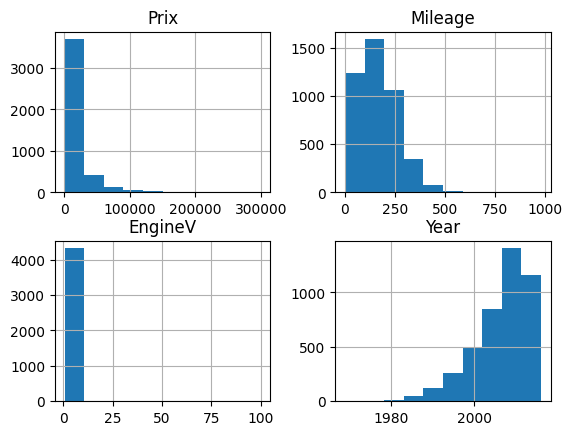

In [18]:
df.hist()

In [19]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head(10)

,Brand,Prix,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,-1.037700,-0.593428,0.271682,1.095267,-0.154724,1.257674,0.317547,-2.314574,-1.670766
1,-0.556452,-0.446119,1.479928,2.514463,0.026042,-0.946680,0.317547,-1.123801,1.133602
2,-0.556452,-0.231127,0.271682,1.861633,0.447831,-0.211895,0.317547,-0.528414,0.805672
3,-1.518947,0.155062,-1.540688,0.745198,0.287150,1.257674,0.317547,0.066972,0.658668
4,0.887289,-0.032061,-1.540688,-0.390159,-0.154724,1.257674,0.317547,0.662359,0.692592
5,-0.556452,7.201974,-1.540688,-1.525516,0.548257,1.257674,0.317547,1.406592,-0.245966
6,-1.037700,-0.517783,0.271682,2.618537,-0.154724,-0.211895,0.317547,-1.421494,-1.670766
7,-1.518947,-0.195295,0.875805,0.366746,-0.014128,-0.946680,0.317547,-0.081874,-1.127986
8,0.406042,-0.330700,0.875805,0.300517,-0.255150,-0.946680,0.317547,0.811206,0.375970
9,1.368536,-0.704905,-0.332441,0.480282,-0.194895,-0.211895,-3.149140,-1.123801,-0.189427


In [20]:
df_scaled.corr()

,Brand,Prix,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
Brand,1.000000,-0.142669,0.091158,-0.085508,-0.048397,-0.047513,0.155198,0.122401,0.335192
Prix,-0.142669,1.000000,-0.302197,-0.442674,0.054351,0.035381,0.187212,0.465860,0.123690
Body,0.091158,-0.302197,1.000000,0.287460,-0.049051,-0.191813,-0.074222,-0.173204,-0.091033
Mileage,-0.085508,-0.442674,0.287460,1.000000,0.019755,-0.171347,-0.224822,-0.668635,-0.115262
EngineV,-0.048397,0.054351,-0.049051,0.019755,1.000000,0.030663,-0.007307,-0.022214,0.026844
Engine Type,-0.047513,0.035381,-0.191813,-0.171347,0.030663,1.000000,0.121222,-0.058127,-0.195631
Registration,0.155198,0.187212,-0.074222,-0.224822,-0.007307,0.121222,1.000000,0.243208,0.176582
Year,0.122401,0.465860,-0.173204,-0.668635,-0.022214,-0.058127,0.243208,1.000000,0.262304
Model,0.335192,0.123690,-0.091033,-0.115262,0.026844,-0.195631,0.176582,0.262304,1.000000


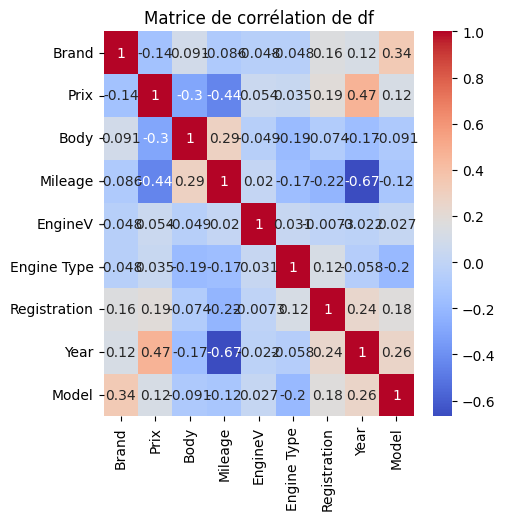

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation de df')
plt.show()

In [25]:
vif = pd.DataFrame()
vif["features"] = df_scaled.columns
vif["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]
vif

,features,VIF
0,Brand,1.237270
1,Prix,1.491287
2,Body,1.196786
3,Mileage,2.112220
4,EngineV,1.011672
5,Engine Type,1.182993
6,Registration,1.133399
7,Year,2.165227
8,Model,1.288328


La colinéarité entre les variables est acceptable. 

### 8. Création d'un set de données d'entraînement et d'un set de données de test (70%,30%).

In [23]:
y = df_scaled['Prix']
X = df_scaled.drop(columns=['Prix'])

In [26]:
# y = Prix, Xm = Mileage, Xe = EngineV, Xe = Year
Xm = df_scaled[['Mileage']]
Xe = df_scaled[['EngineV']]
Xy = df_scaled[['Year']]

In [27]:
Xm_train, Xm_test, y_train, y_test = train_test_split(Xm, y, test_size=0.3)
Xe_train, Xe_test, y_train, y_test = train_test_split(Xe, y, test_size=0.3)
Xy_train, Xy_test, y_train, y_test = train_test_split(Xy, y, test_size=0.3)

In [28]:
(Xm_train.shape, Xm_test.shape, y_train.shape, y_test.shape)

((3041, 1), (1304, 1), (3041,), (1304,))

### 9. Application d'un modèle de régression linéaire simple.

In [29]:
modelm = LinearRegression().fit(Xm_train, y_train)
modele = LinearRegression().fit(Xe_train, y_train)
modely = LinearRegression().fit(Xy_train, y_train)

In [30]:
predictions_m = modelm.predict(Xm_test)
predictions_e = modele.predict(Xe_test)
predictions_y = modely.predict(Xy_test)

### 10. Evaluation du modèle.

In [31]:
mae_m = mean_absolute_error(y_test, predictions_m)
mse_m = mean_squared_error(y_test, predictions_m)
rmse_m = mean_squared_error(y_test, predictions_m, squared=False)
r2_m = r2_score(y_test, predictions_m)

mae_e = mean_absolute_error(y_test, predictions_e)
mse_e = mean_squared_error(y_test, predictions_e)
rmse_e = mean_squared_error(y_test, predictions_e, squared=False)
r2_e = r2_score(y_test, predictions_e)

mae_y = mean_absolute_error(y_test, predictions_y)
mse_y = mean_squared_error(y_test, predictions_y)
rmse_y = mean_squared_error(y_test, predictions_y, squared=False)
r2_y = r2_score(y_test, predictions_y)

print(" ### Calcul du MAE, MSE, RMSE et du coefficient de détermination :")
print(" ")
table2 = [['Ecart-type', y_train.std(), y_train.std(), y_train.std()],
          ['MAE', mae_m, mae_e, mae_y],
          ['MSE', mse_m, mse_e, mse_y],
          ['RMSE', rmse_m, rmse_e, rmse_y],
          ['R²', r2_m, r2_e, r2_y]]
print(tabulate(table2, headers=['Métrique', 'Mileage', 'EngineV', 'Year'], tablefmt='github'))

 ### Calcul du MAE, MSE, RMSE et du coefficient de détermination :
 
| Métrique   |     Mileage |     EngineV |     Year |
|------------|-------------|-------------|----------|
| Ecart-type |  1.04364    |  1.04364    | 1.04364  |
| MAE        |  0.556916   |  0.554766   | 0.468571 |
| MSE        |  0.796646   |  0.793569   | 0.593297 |
| RMSE       |  0.89255    |  0.890825   | 0.770258 |
| R²         | -0.00620184 | -0.00231522 | 0.250637 |


### 11. Application d'un modèle de regression linéaire multiple.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((3041, 8), (1304, 8), (3041,), (1304,))

In [33]:
model = LinearRegression().fit(X_train, y_train)

In [34]:
predictions = model.predict(X_test)

### 12. Evaluation du modèle.

In [35]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

In [36]:
print(" ### Calcul du MAE, MSE, RMSE et du coefficient de détermination :")
print(" ")
table2 = [['Ecart-type', y_train.std()],
          ['MAE', mae],
          ['MSE', mse],
          ['RMSE', rmse],
          ['R²', r2]]
print(tabulate(table2, headers=['Métrique', 'Résultat'], tablefmt='github'))

 ### Calcul du MAE, MSE, RMSE et du coefficient de détermination :
 
| Métrique   |   Résultat |
|------------|------------|
| Ecart-type |   0.993023 |
| MAE        |   0.435168 |
| MSE        |   0.708848 |
| RMSE       |   0.841931 |
| R²         |   0.31377  |


Le modèle de régression linéaire multiple donne de meilleurs résultats que le modèle de régression linéaire simple.

### 13. Application d'un modèle de regression polinomiale.

Xm_train, Xm_test, y_train, y_test
Xe_train, Xe_test, y_train, y_test
Xy_train, Xy_test, y_train, y_test

In [37]:
# Choix du degré
X_list = [Xm_train.columns.values[0], Xe_train.columns.values[0], Xy_train.columns.values[0]]

def degreeChoice (x,y,degree):
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x_p, y_poly_pred_P = zip(*sorted_zip)
    return rmse, r2, x_p, y_poly_pred_P
rmselist = np.zeros(100)
r2list = np.zeros(100)
x_p_list = [None]*100
y_poly_pred_P_list=[None]*100
degree = pd.DataFrame(np.zeros(3), index=X_list, columns=["Degré"])
for j in X_list:
    for i in np.arange(1, 101): #101
        rmselist[i-1], r2list[i-1], x_p_list[i-1], y_poly_pred_P_list[i-1] = degreeChoice(Xm_train, y_train,i)
    degree.loc[j , "Degré"] = np.where(r2list == r2list.max())[0][0]
    print("Meilleur degré")
degree

Meilleur degré
Meilleur degré
Meilleur degré


,Degré
Mileage,16.0
EngineV,16.0
Year,16.0


In [38]:
polynom_features = PolynomialFeatures(degree=16)
Xm_poly = polynom_features.fit_transform(Xm_train)
Xe_poly = polynom_features.fit_transform(Xe_train)
Xy_poly = polynom_features.fit_transform(Xy_train)

model_Xm_poly = LinearRegression()
model_Xe_poly = LinearRegression()
model_Xy_poly = LinearRegression()

model_Xm_poly.fit(Xm_poly, y_train)
model_Xe_poly.fit(Xe_poly, y_train)
model_Xy_poly.fit(Xy_poly, y_train)

y_predict_m = model_Xm_poly.predict(Xm_poly)
y_predict_e = model_Xe_poly.predict(Xe_poly)
y_predict_y = model_Xy_poly.predict(Xy_poly)

In [39]:
len(y_test), len(y_predict_m)

(1304, 3041)

In [40]:
mse_m = mean_squared_error(y_train, y_predict_m).round(3)
r2_m = r2_score(y_train, y_predict_m).round(3)
mse_e = mean_squared_error(y_train, y_predict_e).round(3)
r2_e = r2_score(y_train, y_predict_e).round(3)
mse_y = mean_squared_error(y_train, y_predict_y).round(3)
r2_y = r2_score(y_train, y_predict_y).round(3)

In [41]:
print(" ### Calcul du MAE, MSE, RMSE et du coefficient de détermination :")
print(" ")
table2 = [['m', mse_m, r2_m],
          ['e', mse_e, r2_e],
          ['y', mse_y, r2_y]]
print(tabulate(table2, headers=[' ', 'MSE', 'R²'], tablefmt='github'))

 ### Calcul du MAE, MSE, RMSE et du coefficient de détermination :
 
|     |   MSE |    R² |
|-----|-------|-------|
| m   | 0.979 | 0.007 |
| e   | 0.985 | 0.001 |
| y   | 0.982 | 0.003 |


##### Pour finir la série sur la régression, il est possible d'en faire une polynomiale multiple. Elle est cependant plus gourmande en ressources mémoire.